In [20]:
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import torch

from src.get_datasets import *

In [21]:
model_training_path = './experiments/mcdo/results/'
all_xps = [f for f in listdir(model_training_path) if isfile(join(model_training_path, f))]
for f in all_xps:
    print(f)

xp_MCD_CNN_7L_Cifar10_small_Thu_Feb_11_17_36_49_2021.npy
xp_MCD_CNN_8L_224_3C_Thu_Feb_11_18_09_00_2021.npy


In [22]:
xp = np.load(model_training_path+all_xps[0], allow_pickle=True).item()

{'path': '/home/dgrinwald/projects/bayes_act_max/experiments/mcdo/',
 'model': 'MCD_CNN_7L_Cifar10_small',
 'ds': 'cifar10_small_augmented',
 'batch_size': 50,
 'epochs': 50,
 'lr_scheduler': 'StepLR',
 'gamma': 0.1,
 'lrs': [0.001],
 'ps': [0.0, 0.125, 0.25, 0.5, 0.75],
 'wds': [0.0],
 'training_stats': {'p_0.0': {'lr_0.001': {'wd_0.0': {'model_save_path': '/home/dgrinwald/projects/bayes_act_max/experiments/mcdo//models/MCD_CNN_7L_Cifar10_small_p_0.0_lr_0.001.pt_wd_0.0.pt',
     'train_accs': array([0.43754, 0.63454, 0.70738, 0.74412, 0.77142, 0.7864 , 0.80246,
            0.81392, 0.82308, 0.82788, 0.8359 , 0.84318, 0.84836, 0.85422,
            0.85856, 0.86176, 0.86742, 0.87046, 0.87388, 0.87444, 0.87836,
            0.88194, 0.88622, 0.88556, 0.88968, 0.89168, 0.89342, 0.89126,
            0.8993 , 0.90132, 0.90158, 0.90276, 0.90476, 0.90566, 0.9085 ,
            0.9096 , 0.91232, 0.91276, 0.91172, 0.91518, 0.91564, 0.9172 ,
            0.9188 , 0.92016, 0.92168, 0.92408, 0.92336,

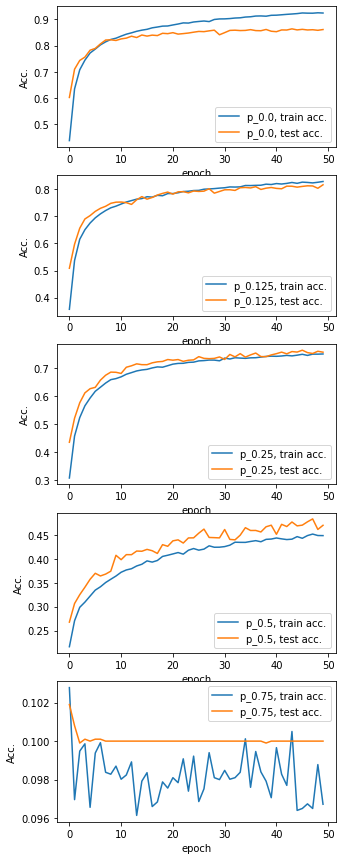

In [23]:
fig, ax = plt.subplots(len(xp['training_stats'].keys()), 1, figsize=(5,15))
for i, p in enumerate(xp['training_stats'].keys()):
    for lr in xp['training_stats'][p].keys():
        for wd in xp['training_stats'][p][lr].keys():

            train_accs = xp['training_stats'][p][lr][wd]['train_accs']
            test_accs = xp['training_stats'][p][lr][wd]['test_accs']

            ax[i].plot(train_accs, label=f'{p}, train acc.')
            ax[i].plot(test_accs, label=f'{p}, test acc.')
            ax[i].set_xlabel('epoch')
            ax[i].set_ylabel('Acc.')
            ax[i].legend()

dict_keys(['model_save_path', 'train_accs', 'test_accs'])

In [24]:
entropy_points_path = './experiments/mcdo/high_entropy_points/'
all_xps = [f for f in listdir(entropy_points_path) if isfile(join(entropy_points_path, f))]
for f in all_xps:
    print(f)

compute_predictive_entropies_high_ent_points_Fri_Feb_12_09_43_57_2021.npy


In [25]:
all_xps[0]

'compute_predictive_entropies_high_ent_points_Fri_Feb_12_09_43_57_2021.npy'

In [26]:
xp = np.load(entropy_points_path + all_xps[0], allow_pickle=True)

array([0.7055378, 0.       , 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.       , 0.       ])

In [27]:
trainloader, testloader, classes = load_cifar10_small_augmented()

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# Highest entropy images
total = 10
fig, ax = plt.subplots(1, total, figsize=(30,15))
for i in range(total):
  img = np.transpose(testset[max_entropy_ids[i]][0], (1,2,0))
  preprocessed_img = (img - img.min()) / (img.max() - img.min())
  ax[i].imshow(preprocessed_img)
  ax[i].set_title(f'{class_to_name[idx_to_class[testloader.dataset[max_entropy_ids[i]][1]]]}')